In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from tqdm import tqdm

In [2]:
Nt = 500
Nx = 60
Ny = 60

x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Ny)
t = np.linspace(0,10,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = [0.3,0.3]



In [3]:
def h1(x,y):
    return 5*np.exp(-(x**2+y**2))

In [4]:
def InitT():
    u = np.zeros((Nt,Nx,Ny))
    for i in range(Nx):
        for j in range(Ny):
            u[0,i,j] = h1(x[i],y[j])
    return u

In [5]:
u = InitT()

In [6]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                u[l,i,j] = u[l-1,i,j] + deltat*(-u[l-1,i,j]*(u[l-1,i+1,j]-u[l-1,i-1,j])/(2*deltax) + v[0]*(u[l-1,i+1,j]-2*u[l-1,i,j]+u[l-1,i-1,j])/(deltax**2)) + deltat*(-u[l-1,i,j]*(u[l-1,i,j+1]-u[l-1,i,j-1])/(2*deltay) + v[1]*(u[l-1,i,j+1]-2*u[l-1,i,j]+u[l-1,i,j-1])/(deltay**2))

In [7]:
GetSolution()

  1%|          | 4/499 [00:00<00:14, 33.83it/s]

100%|██████████| 499/499 [00:13<00:00, 36.61it/s]


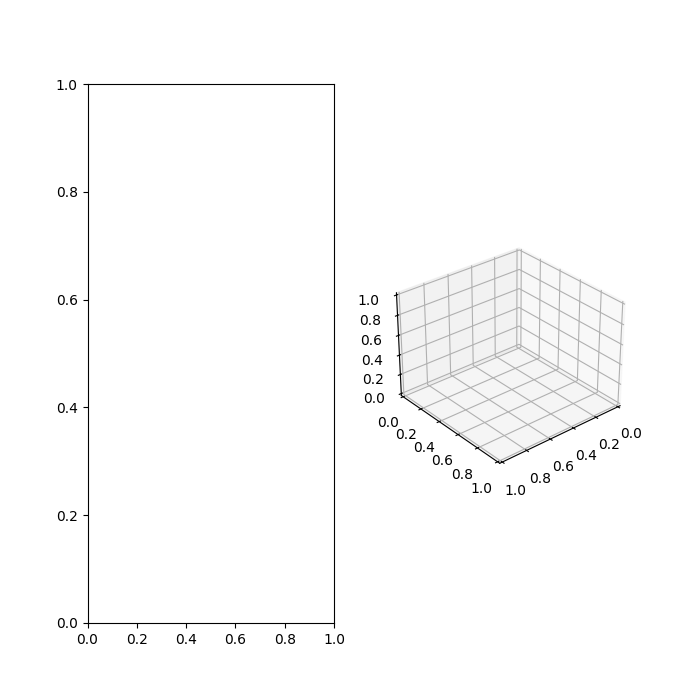

In [8]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2, projection = '3d',elev = 30, azim = 50)

X,Y = np.meshgrid(x,y)

def init():

    ax2.set_xlim3d(-5.,5.)
    ax2.set_ylim3d(-5.,5.)
    ax2.set_zlim3d(0.,5.)
    
    ax2.set_xlabel('$x$', fontsize=15)
    ax2.set_ylabel('$y$', fontsize=15)
    ax2.set_zlabel(r'$u(x,y)$', fontsize=15)

def Update(i):

    plot = ax1.clear()
    plot = ax2.clear()
    init()
    
    surf = ax1.contourf(X,Y,u[i,:,:].T)
    #cbar = fig.colorbar(surf, ax = ax1)  
    
    
    plot = ax2.plot_surface(X, Y, u[i,:,:].T, cmap='viridis') 
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle='none', c='b', marker='o')
    ax2.legend([fake2Dline], [r'$u(x,y)$'], numpoints = 1)
    
    
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)